In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import mplfinance as mpf

from datetime import timedelta
from scipy import stats

In [2]:
font = {'size': 16}
plt.rc('font', **font)

In [3]:
# ฟังก์ชันตรวจจับ Drip
def detect_drip(data, window=12, threshold=-0.05):
  drips = []
  for i in range(len(data) - window):
    # เพิ่มในฟังก์ชัน detect_drip
    if drips and (data.index[i] - drips[-1]['start_time']).total_seconds() / 3600 < window:
      continue  # ข้ามถ้า Drip ใหม่เริ่มภายใน 12 ชั่วโมงจาก Drip ก่อนหน้า
    
    close_price = data['close'].iloc[i]
    low_price = data['low'].iloc[i:i+window].min()
    drip_pct = (low_price - close_price) / close_price
    if drip_pct <= threshold:
      drips.append({
        'start_time': data.index[i],
        'close_price': close_price,
        'low_price': low_price,
        'drip_pct': drip_pct * 100,  # แปลงเป็น %
        'window_end_time': data.index[i+window-1]
      })
  
  return pd.DataFrame(drips)

In [4]:
data = pd.read_pickle(os.path.abspath("../datasets/processed/1h/BTCUSDT.pkl"))
#data = data["2024-01-01":"2024-12-31"]

In [5]:
drips = detect_drip(data, window=12, threshold=-0.05)

In [6]:
drips

,start_time,close_price,low_price,drip_pct,window_end_time
0,2017-08-17 09:00:00+00:00,4444.00,4200.74,-5.473897,2017-08-17 20:00:00+00:00
1,2017-08-18 07:00:00+00:00,4300.25,4066.53,-5.435033,2017-08-18 18:00:00+00:00
2,2017-08-19 00:00:00+00:00,4163.49,3850.00,-7.529500,2017-08-19 11:00:00+00:00
3,2017-08-20 19:00:00+00:00,4164.60,3953.40,-5.071315,2017-08-21 06:00:00+00:00
4,2017-08-21 14:00:00+00:00,3989.17,3688.97,-7.525375,2017-08-22 01:00:00+00:00
...,...,...,...,...,...
706,2025-03-10 06:00:00+00:00,82332.67,78202.00,-5.017049,2025-03-10 17:00:00+00:00
707,2025-04-02 15:00:00+00:00,86757.67,82175.98,-5.281020,2025-04-03 02:00:00+00:00
708,2025-04-06 07:00:00+00:00,83024.96,78694.99,-5.215263,2025-04-06 18:00:00+00:00
709,2025-04-06 19:00:00+00:00,79614.35,74555.00,-6.354822,2025-04-07 06:00:00+00:00


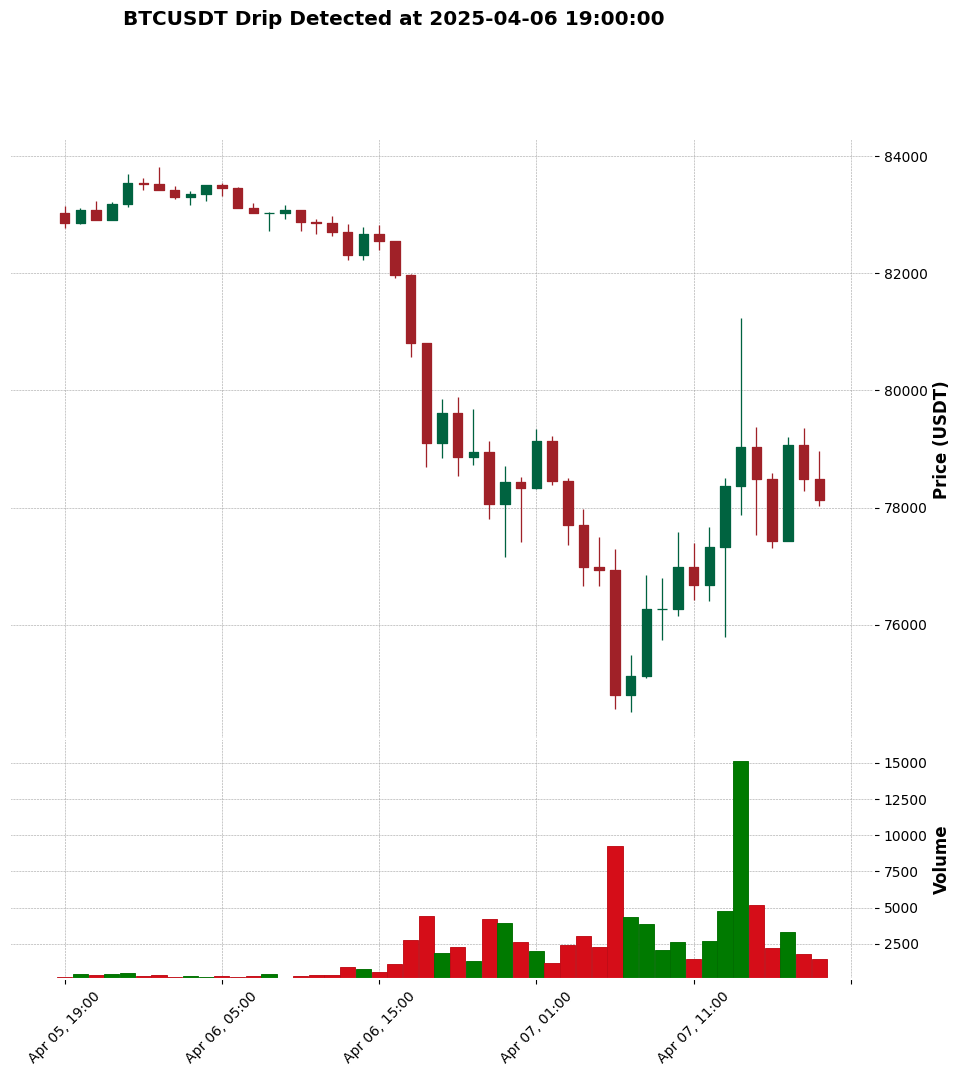

In [7]:
start_time = drips.iloc[-2]['start_time']
drip_data = data[start_time - timedelta(hours=24):start_time + timedelta(hours=24)]

mpf.plot(
  drip_data,
  type='candle',
  style='charles',
  title=f"BTCUSDT Drip Detected at {start_time.strftime('%Y-%m-%d %H:%M:%S')}",
  ylabel='Price (USDT)',
  volume=True,
  figsize=(12, 12)
)